In [1]:
!pip install pymongo
from pymongo import MongoClient

In [2]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
client = MongoClient('mongodb://localhost:27017/')

In [4]:
#Create the 'energy_data' database and collection 
db = client['energy_data']
collection = db["biofuel_wind_electricity_data_collection"] 

In [5]:
# Load the csv file using pandas
file_path = "World Energy Consumption.csv" 
df = pd.read_csv(file_path)

# Display the DataFrame to verify the data
df.head()




,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [6]:
#total rows  
df.count()

country                   22012
year                      22012
iso_code                  16512
population                18123
gdp                       11113
                          ...  
wind_elec_per_capita       7065
wind_electricity           7996
wind_energy_per_capita     4065
wind_share_elec            6886
wind_share_energy          4101
Length: 129, dtype: int64

In [7]:
# Inspect the columns 
df.columns


Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

In [8]:
#Check for null values in the DataFrame
print("\nNull values per column:")
print(df.isnull().sum())


Null values per column:
country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64


In [9]:
# Remove rows with null values
df_cleaned = df.dropna()  # Removes any rows with null values
print("\nDataFrame after removing rows with null values:")
df_cleaned.head(10)





DataFrame after removing rows with null values:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160
1076,Argentina,2016,ARG,43668236.0,8.283729e+11,5.989,0.906,367.251,16.037,24.503,...,0.007,0.004,-7.749,-0.133,1.465,12.366,0.54,33.555,0.387,0.148
2966,Brazil,2013,BRA,201721776.0,3.112906e+12,16.904,24.974,856.203,172.715,194.674,...,0.000,0.000,30.215,4.075,17.922,32.619,6.58,88.845,1.168,0.516
2967,Brazil,2014,BRA,203459648.0,3.128573e+12,9.678,16.715,931.044,189.430,221.911,...,0.003,0.001,85.683,15.157,33.079,60.012,12.21,162.581,2.098,0.928
2968,Brazil,2015,BRA,205188208.0,3.270706e+12,16.967,32.141,1079.843,221.571,231.690,...,0.010,0.005,77.111,25.159,58.237,104.636,21.47,283.824,3.756,1.656
2969,Brazil,2016,BRA,206859584.0,2.889037e+12,-9.000,-19.942,974.715,201.629,237.552,...,0.014,0.007,54.857,31.414,89.651,160.689,33.24,433.390,5.817,2.612


In [10]:
#total rows after removing nulls
df_cleaned.count()

country                   194
year                      194
iso_code                  194
population                194
gdp                       194
                         ... 
wind_elec_per_capita      194
wind_electricity          194
wind_energy_per_capita    194
wind_share_elec           194
wind_share_energy         194
Length: 129, dtype: int64

In [11]:
# Remove duplicate rows based on all columns 
df_no_duplicates = df_cleaned.drop_duplicates()  
print("\nDataFrame after removing duplicates:")
df_no_duplicates.head()




DataFrame after removing duplicates:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


In [12]:
# check the shape of the cleaned DataFrame to verify the number of rows and columns
print("\nShape of the DataFrame after cleaning (rows, columns):", df_no_duplicates.shape)


Shape of the DataFrame after cleaning (rows, columns): (194, 129)


In [13]:
# Remove specific columns from the DataFrame
columns_to_remove = ['coal_cons_change_pct','coal_cons_change_twh','coal_cons_per_capita','coal_consumption','coal_elec_per_capita','coal_electricity','coal_prod_change_pct','coal_prod_change_twh','coal_prod_per_capita','coal_production','coal_share_elec','coal_share_energy','fossil_cons_change_pct','fossil_cons_change_twh','fossil_elec_per_capita','fossil_electricity','fossil_energy_per_capita','fossil_fuel_consumption','fossil_share_elec','fossil_share_energy','gas_cons_change_pct','gas_cons_change_twh','gas_consumption','gas_elec_per_capita','gas_electricity','gas_energy_per_capita','gas_prod_change_pct','gas_prod_change_twh','gas_prod_per_capita','gas_production','gas_share_elec','gas_share_energy','greenhouse_gas_emissions','hydro_cons_change_pct','hydro_cons_change_twh','hydro_consumption','hydro_elec_per_capita','hydro_electricity','hydro_energy_per_capita','hydro_share_elec','hydro_share_energy','low_carbon_cons_change_pct','low_carbon_cons_change_twh','low_carbon_consumption','low_carbon_elec_per_capita','low_carbon_electricity','low_carbon_energy_per_capita','low_carbon_share_elec','low_carbon_share_energy','net_elec_imports','net_elec_imports_share_demand','nuclear_cons_change_pct','nuclear_cons_change_twh','nuclear_consumption','nuclear_elec_per_capita','nuclear_electricity','nuclear_energy_per_capita','nuclear_share_elec','nuclear_share_energy','oil_cons_change_pct','oil_cons_change_twh','oil_consumption','oil_elec_per_capita','oil_electricity','oil_energy_per_capita','oil_prod_change_pct','oil_prod_change_twh','oil_prod_per_capita','oil_production','oil_share_elec','oil_share_energy','other_renewable_consumption','other_renewable_electricity','other_renewable_exc_biofuel_electricity','other_renewables_cons_change_pct','other_renewables_cons_change_twh','other_renewables_elec_per_capita','other_renewables_elec_per_capita_exc_biofuel','other_renewables_energy_per_capita','other_renewables_share_elec','other_renewables_share_elec_exc_biofuel','other_renewables_share_energy','per_capita_electricity','primary_energy_consumption','renewables_cons_change_pct','renewables_cons_change_twh','renewables_consumption','renewables_elec_per_capita','renewables_electricity','renewables_energy_per_capita','renewables_share_elec','renewables_share_energy','solar_cons_change_pct','solar_cons_change_twh','solar_consumption','solar_elec_per_capita','solar_electricity','solar_energy_per_capita','solar_share_elec','solar_share_energy']  # Replace with the actual column names you want to remove
df_final = df_no_duplicates.drop(columns=columns_to_remove)
#  Round numeric columns to 2 decimal places
df_final = df_final.round(2)

print("\nDataFrame after removing specific columns:")
df_final.head()



DataFrame after removing specific columns:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,energy_per_capita,energy_per_gdp,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.42,2.75,208.89,8.67,32.27,...,21894.87,1.09,4.89,0.00,0.07,1.44,0.06,1.77,0.05,0.01
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.88,1.72,247.83,10.40,33.13,...,22494.72,1.14,1290.95,0.94,1.01,19.55,0.82,24.17,0.64,0.11
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.48,1.50,280.80,11.90,35.39,...,23152.59,1.16,22.57,0.22,1.24,23.83,1.01,29.15,0.76,0.13
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.71,1.99,324.38,13.89,32.69,...,22881.01,1.19,36.65,0.44,1.68,14.48,0.62,39.19,0.47,0.17
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.93,1.24,349.79,15.13,33.06,...,23046.87,1.18,-4.22,-0.08,1.60,13.64,0.59,36.94,0.43,0.16


In [14]:
df_final.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita', 'biofuel_electricity', 'biofuel_share_elec',
       'biofuel_share_energy', 'carbon_intensity_elec', 'electricity_demand',
       'electricity_generation', 'electricity_share_energy',
       'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita',
       'energy_per_gdp', 'wind_cons_change_pct', 'wind_cons_change_twh',
       'wind_consumption', 'wind_elec_per_capita', 'wind_electricity',
       'wind_energy_per_capita', 'wind_share_elec', 'wind_share_energy'],
      dtype='object')

In [15]:

# check DataFrame shape after removing columns
print("\nShape of the DataFrame after column removal (rows, columns):", df_final.shape)


Shape of the DataFrame after column removal (rows, columns): (194, 29)


In [16]:
# Iterate over the DataFrame rows and insert them into MongoDB
for index, row in df_final.iterrows():
    # Convert each row to a dictionary for MongoDB insertion
    collection.insert_one(row.to_dict())

print("Cleaned DataFrame inserted successfully into MongoDB!")



Cleaned DataFrame inserted successfully into MongoDB!


In [17]:
# Fetch the first 5 records from MongoDB and convert them to a DataFrame
records = list(collection.find()) 
df_mongo = pd.DataFrame(records)
#  Display the DataFrame containing the records
print("\nDataFrame containing the records from MongoDB:")
df_mongo.round(2)


DataFrame containing the records from MongoDB:


,_id,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,...,energy_per_capita,energy_per_gdp,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,6706c1aca23c6d17b56acad1,Argentina,2011,ARG,41520736.0,8.359705e+11,46.42,2.75,208.89,8.67,...,21894.87,1.09,4.89,0.00,0.07,1.44,0.06,1.77,0.05,0.01
1,6706c1aca23c6d17b56acad2,Argentina,2012,ARG,41952364.0,8.274048e+11,19.88,1.72,247.83,10.40,...,22494.72,1.14,1290.95,0.94,1.01,19.55,0.82,24.17,0.64,0.11
2,6706c1aca23c6d17b56acad3,Argentina,2013,ARG,42388268.0,8.473051e+11,14.48,1.50,280.80,11.90,...,23152.59,1.16,22.57,0.22,1.24,23.83,1.01,29.15,0.76,0.13
3,6706c1aca23c6d17b56acad4,Argentina,2014,ARG,42824064.0,8.259815e+11,16.71,1.99,324.38,13.89,...,22881.01,1.19,36.65,0.44,1.68,14.48,0.62,39.19,0.47,0.17
4,6706c1aca23c6d17b56acad5,Argentina,2015,ARG,43257064.0,8.478550e+11,8.93,1.24,349.79,15.13,...,23046.87,1.18,-4.22,-0.08,1.60,13.64,0.59,36.94,0.43,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,67072763fa79d3bd4b7c07b4,United States,2014,USA,322033952.0,1.648266e+13,1.43,5.09,1119.49,360.52,...,80725.09,1.58,8.23,35.04,497.09,564.07,181.65,1543.60,4.43,1.91
1354,67072763fa79d3bd4b7c07b5,United States,2015,USA,324607776.0,1.690258e+13,4.63,16.70,1162.05,377.21,...,79317.37,1.52,4.99,21.70,518.79,587.54,190.72,1598.20,4.67,2.02
1355,67072763fa79d3bd4b7c07b6,United States,2016,USA,327210208.0,1.716256e+13,8.49,32.02,1250.66,409.23,...,78613.54,1.50,19.02,95.02,613.81,693.71,226.99,1875.88,5.55,2.39
1356,67072763fa79d3bd4b7c07b7,United States,2017,USA,329791232.0,1.759628e+13,0.20,0.82,1243.37,410.05,...,78289.01,1.47,12.03,69.80,683.61,771.09,254.30,2072.86,6.28,2.65


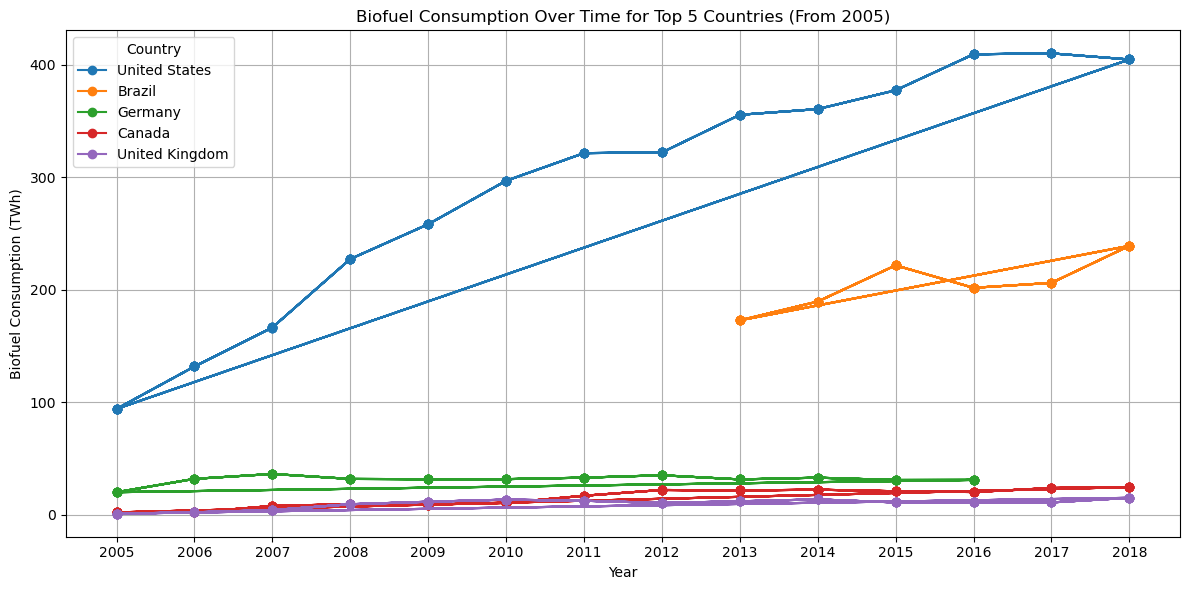

In [18]:

# Filter for the last 10 decades (2010 to 2020)
filtered_df = df_mongo[(df_mongo['year'] >= 2005) & (df_mongo['year'] <= 2024)]

# Get the top 5 countries by total biofuel consumption
top_countries = filtered_df.groupby('country')['biofuel_consumption'].sum().nlargest(5).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Biofuel Consumption
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['biofuel_consumption'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Biofuel Consumption (TWh)')
plt.title('Biofuel Consumption Over Time for Top 5 Countries (From 2005)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


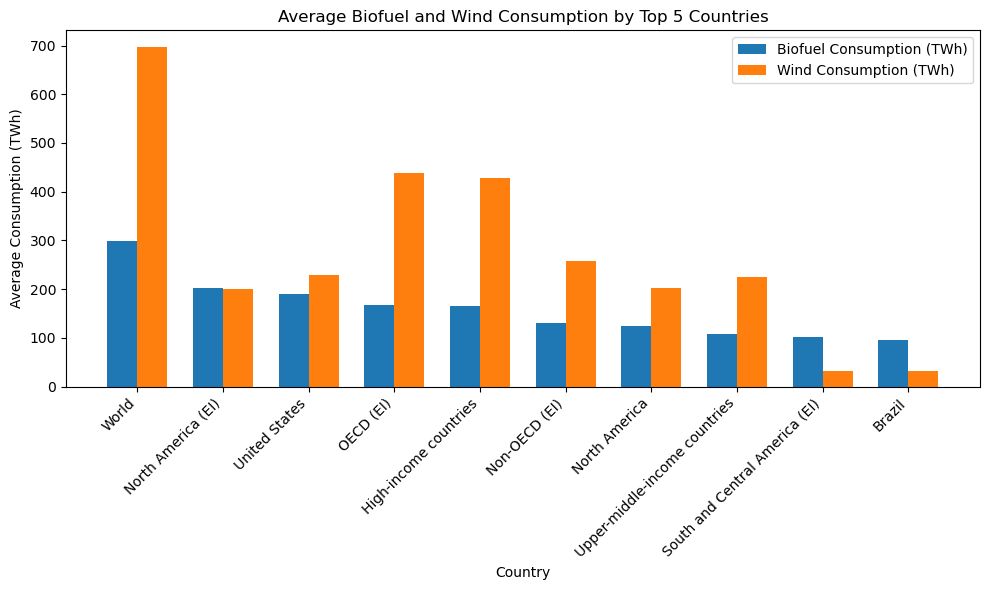

In [19]:

# Step 1: Calculate average consumption per country
avg_consumption = df.groupby('country').agg({
    'biofuel_consumption': 'mean',
    'wind_consumption': 'mean'
}).reset_index()

# Step 2: Get top 5 countries by average biofuel consumption
top_5_countries = avg_consumption.nlargest(10, 'biofuel_consumption')

# Step 3: Set the bar width and position
bar_width = 0.35
x = range(len(top_5_countries))

# rotate x-axis labels
plt.figure(figsize=(10, 6))
plt.bar(x, top_5_countries['biofuel_consumption'], width=bar_width, label='Biofuel Consumption (TWh)', color='tab:blue', align='center')
plt.bar([p + bar_width for p in x], top_5_countries['wind_consumption'], width=bar_width, label='Wind Consumption (TWh)', color='tab:orange', align='center')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average Consumption (TWh)')
plt.title('Average Biofuel and Wind Consumption by Top 5 Countries')

# Adjust the x-axis ticks to avoid overlap
plt.xticks([p + bar_width / 2 for p in x], top_5_countries['country'], rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()


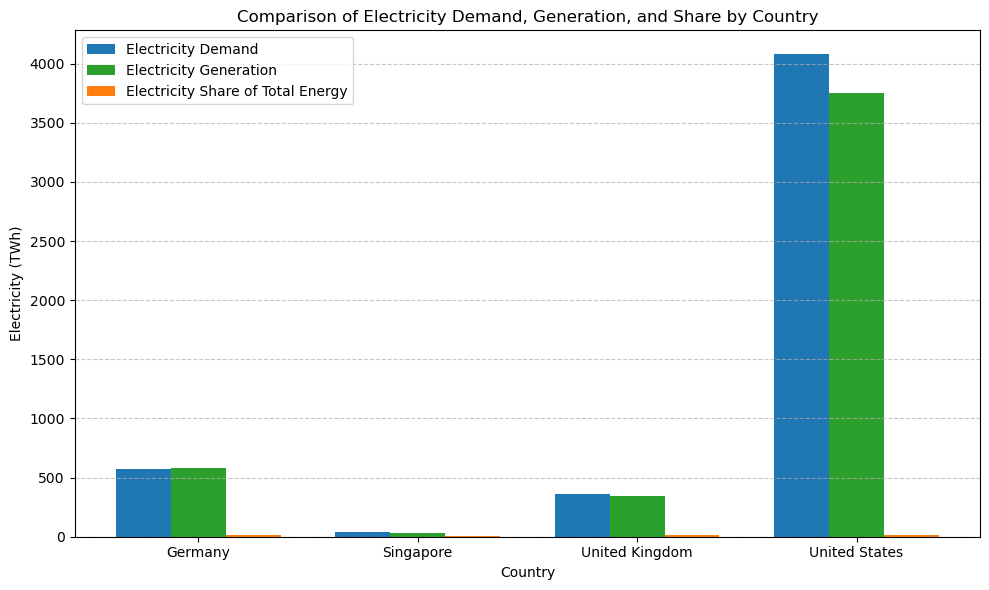

In [20]:

# Filter the DataFrame for the selected countries
selected_countries = ['Singapore', 'United States', 'United Kingdom', 'Germany']
df_filtered = df[df['country'].isin(selected_countries)]

#  Group by country and calculate the average for each column of interest
avg_electricity = df_filtered.groupby('country').agg({
    'electricity_demand': 'mean',
    'electricity_generation': 'mean',
    'electricity_share_energy': 'mean'
}).reset_index()

#  Set the bar width and positions
bar_width = 0.25
x = np.arange(len(avg_electricity))

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, avg_electricity['electricity_demand'], width=bar_width, label='Electricity Demand', color='tab:blue')
plt.bar(x + bar_width, avg_electricity['electricity_generation'], width=bar_width, label='Electricity Generation', color='tab:green')
plt.bar(x + 2 * bar_width, avg_electricity['electricity_share_energy'], width=bar_width, label='Electricity Share of Total Energy', color='tab:orange')

# Add labels, title, and customizations
plt.xlabel('Country')
plt.ylabel('Electricity (TWh)')
plt.title('Comparison of Electricity Demand, Generation, and Share by Country')
plt.xticks(x + bar_width, avg_electricity['country'])
plt.legend()

# Improve aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()